# Company Data

Random Forest
 
Assignment


About the data: 
Let’s consider a Company dataset with around 10 variables and 400 records. 
The attributes are as follows: 
 Sales -- Unit sales (in thousands) at each location
 Competitor Price -- Price charged by competitor at each location
 Income -- Community income level (in thousands of dollars)
 Advertising -- Local advertising budget for company at each location (in thousands of dollars)
 Population -- Population size in region (in thousands)
 Price -- Price company charges for car seats at each site
 Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site
 Age -- Average age of the local population
 Education -- Education level at each location
 Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location
 US -- A factor with levels No and Yes to indicate whether the store is in the US or not
The company dataset looks like this: 
 
Problem Statement:
A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
Approach - A Random Forest can be built with target variable Sales (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  


In [12]:
#Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
data=pd.read_csv(r"C:\Users\keert\Downloads\Company_Data.csv")
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [15]:
data.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [16]:
data.shape

(400, 11)

In [17]:
data.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [18]:
data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [6]:
#Defining the data frame
df=pd.DataFrame(data)

C:\Users\keert\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


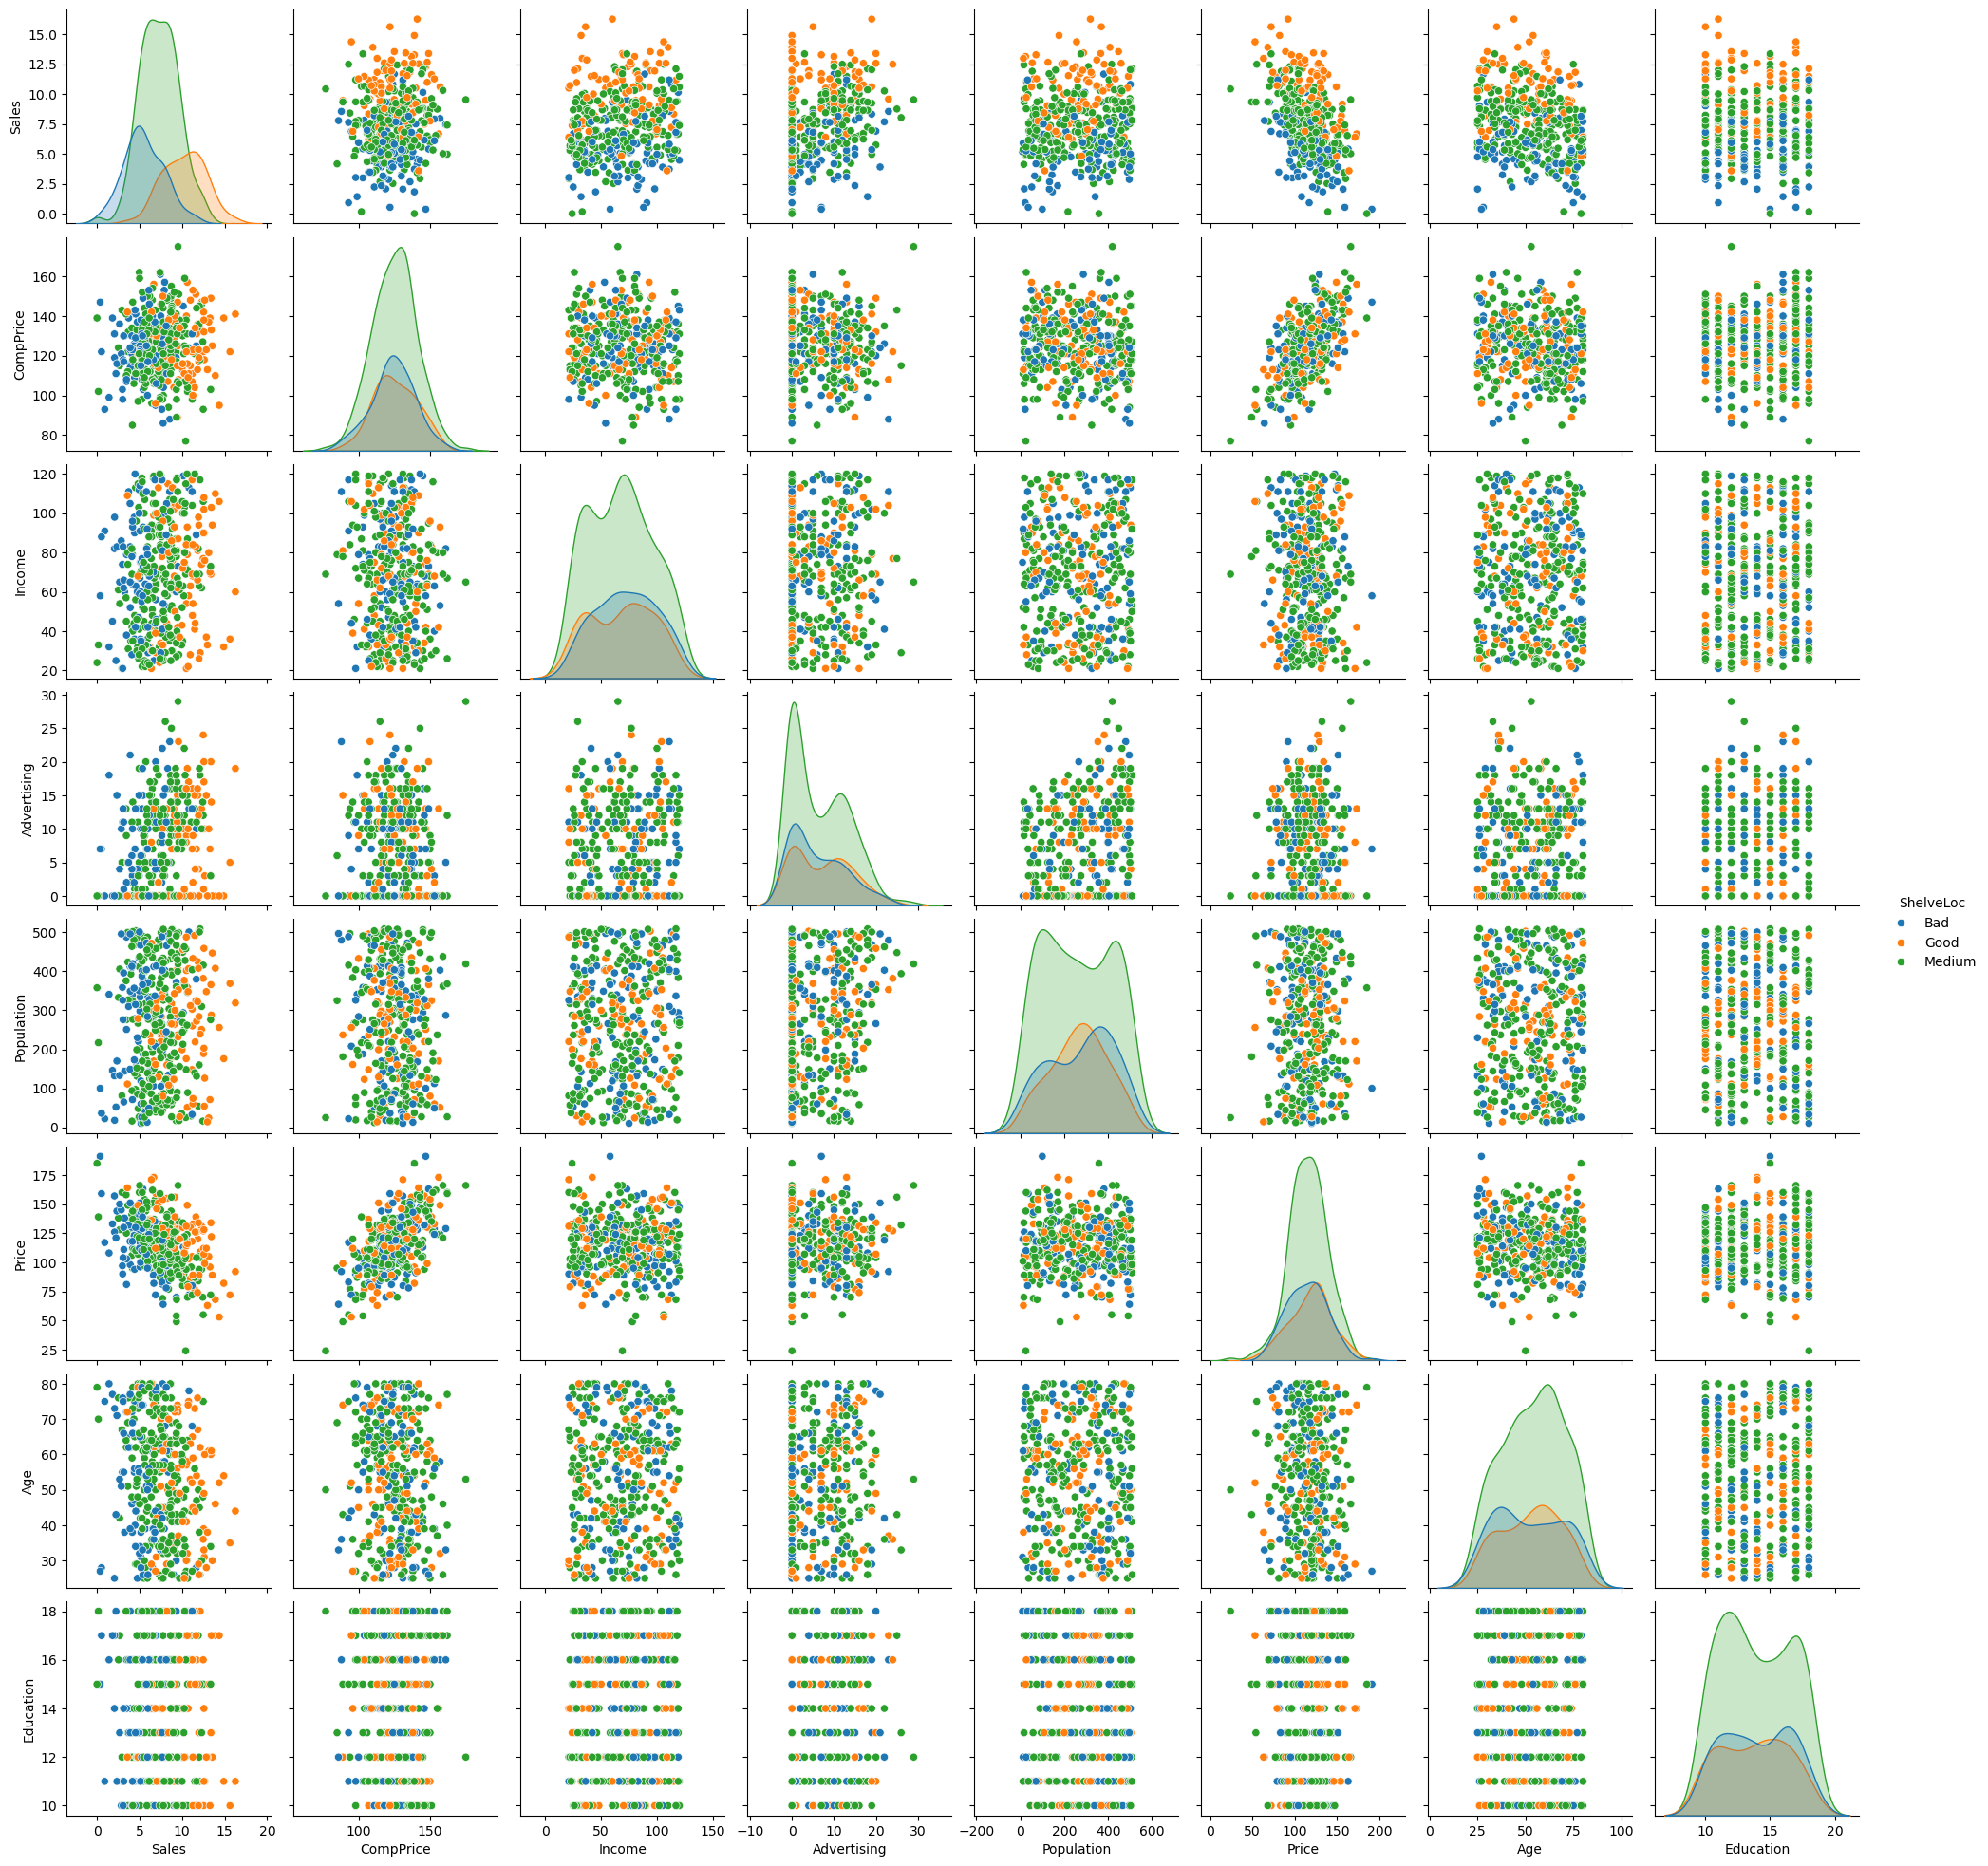

In [7]:
# let's plot pair plot to visualise the attributes all at once
sns.pairplot(data=data, hue = 'ShelveLoc')

In [8]:
#Create dummies for ShelveLoc
dummies = pd.get_dummies(df['ShelveLoc']).rename(columns=lambda x: 'ShelveLoc_' + str(x))
#bring the dummies back into the original dataset
df=pd.concat([df, dummies], axis=1)
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,1,0,0
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,0,1,0
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,0,0,1
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,0,0,1
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes,0,1,0
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes,0,0,1
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes,0,0,1
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes,1,0,0


In [9]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,1,0,0
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,0,1,0
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,0,0,1
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,0,0,1
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,1,0,0


In [10]:
df = df.drop(['ShelveLoc'], axis=1)
df

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban,US,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium
0,9.50,138,73,11,276,120,42,17,Yes,Yes,1,0,0
1,11.22,111,48,16,260,83,65,10,Yes,Yes,0,1,0
2,10.06,113,35,10,269,80,59,12,Yes,Yes,0,0,1
3,7.40,117,100,4,466,97,55,14,Yes,Yes,0,0,1
4,4.15,141,64,3,340,128,38,13,Yes,No,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,Yes,Yes,0,1,0
396,6.14,139,23,3,37,120,55,11,No,Yes,0,0,1
397,7.41,162,26,12,368,159,40,18,Yes,Yes,0,0,1
398,5.94,100,79,7,284,95,50,12,Yes,Yes,1,0,0


In [11]:
#Create dummies for Urban Column
dummies = pd.get_dummies(df['Urban']).rename(columns=lambda x: 'Urban_' + str(x))
#bring the dummies back into the original dataset
df=pd.concat([df, dummies], axis=1)
df

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban,US,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes
0,9.50,138,73,11,276,120,42,17,Yes,Yes,1,0,0,0,1
1,11.22,111,48,16,260,83,65,10,Yes,Yes,0,1,0,0,1
2,10.06,113,35,10,269,80,59,12,Yes,Yes,0,0,1,0,1
3,7.40,117,100,4,466,97,55,14,Yes,Yes,0,0,1,0,1
4,4.15,141,64,3,340,128,38,13,Yes,No,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,Yes,Yes,0,1,0,0,1
396,6.14,139,23,3,37,120,55,11,No,Yes,0,0,1,1,0
397,7.41,162,26,12,368,159,40,18,Yes,Yes,0,0,1,0,1
398,5.94,100,79,7,284,95,50,12,Yes,Yes,1,0,0,0,1


In [12]:
df = df.drop(['Urban'], axis=1)
df

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,US,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes
0,9.50,138,73,11,276,120,42,17,Yes,1,0,0,0,1
1,11.22,111,48,16,260,83,65,10,Yes,0,1,0,0,1
2,10.06,113,35,10,269,80,59,12,Yes,0,0,1,0,1
3,7.40,117,100,4,466,97,55,14,Yes,0,0,1,0,1
4,4.15,141,64,3,340,128,38,13,No,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,Yes,0,1,0,0,1
396,6.14,139,23,3,37,120,55,11,Yes,0,0,1,1,0
397,7.41,162,26,12,368,159,40,18,Yes,0,0,1,0,1
398,5.94,100,79,7,284,95,50,12,Yes,1,0,0,0,1


In [13]:
#Create dummies for US Column
dummies = pd.get_dummies(df['US']).rename(columns=lambda x: 'US_' + str(x))
#bring the dummies back into the original dataset
df=pd.concat([df, dummies], axis=1)
df

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,US,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,9.50,138,73,11,276,120,42,17,Yes,1,0,0,0,1,0,1
1,11.22,111,48,16,260,83,65,10,Yes,0,1,0,0,1,0,1
2,10.06,113,35,10,269,80,59,12,Yes,0,0,1,0,1,0,1
3,7.40,117,100,4,466,97,55,14,Yes,0,0,1,0,1,0,1
4,4.15,141,64,3,340,128,38,13,No,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,Yes,0,1,0,0,1,0,1
396,6.14,139,23,3,37,120,55,11,Yes,0,0,1,1,0,0,1
397,7.41,162,26,12,368,159,40,18,Yes,0,0,1,0,1,0,1
398,5.94,100,79,7,284,95,50,12,Yes,1,0,0,0,1,0,1


In [14]:
df = df.drop(['US'], axis=1)
df

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,9.50,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,11.22,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,10.06,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,7.40,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,4.15,141,64,3,340,128,38,13,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,0,1,0,0,1,0,1
396,6.14,139,23,3,37,120,55,11,0,0,1,1,0,0,1
397,7.41,162,26,12,368,159,40,18,0,0,1,0,1,0,1
398,5.94,100,79,7,284,95,50,12,1,0,0,0,1,0,1


In [15]:
row_indexes=df[df['Sales']>=10].index
df.loc[row_indexes,'sales']="yes"

In [16]:
row_indexes=df[df['Sales']<10].index
df.loc[row_indexes,'sales']="no"

In [17]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes,sales
0,9.50,138,73,11,276,120,42,17,1,0,0,0,1,0,1,no
1,11.22,111,48,16,260,83,65,10,0,1,0,0,1,0,1,yes
2,10.06,113,35,10,269,80,59,12,0,0,1,0,1,0,1,yes
3,7.40,117,100,4,466,97,55,14,0,0,1,0,1,0,1,no
4,4.15,141,64,3,340,128,38,13,1,0,0,0,1,1,0,no


In [18]:
df = df.drop(['Sales'],axis=1)

In [19]:
colnames = list(df.columns)
colnames

['CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'Age',
 'Education',
 'ShelveLoc_Bad',
 'ShelveLoc_Good',
 'ShelveLoc_Medium',
 'Urban_No',
 'Urban_Yes',
 'US_No',
 'US_Yes',
 'sales']

In [20]:
predictors = colnames[:14]
target = colnames[14]

In [21]:
target

'sales'

In [22]:
predictors

['CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'Age',
 'Education',
 'ShelveLoc_Bad',
 'ShelveLoc_Good',
 'ShelveLoc_Medium',
 'Urban_No',
 'Urban_Yes',
 'US_No',
 'US_Yes']

In [23]:
X = df[predictors]
Y = df[target]
X

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,141,64,3,340,128,38,13,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,33,14,0,1,0,0,1,0,1
396,139,23,3,37,120,55,11,0,0,1,1,0,0,1
397,162,26,12,368,159,40,18,0,0,1,0,1,0,1
398,100,79,7,284,95,50,12,1,0,0,0,1,0,1


In [24]:
Y

0       no
1      yes
2      yes
3       no
4       no
      ... 
395    yes
396     no
397     no
398     no
399     no
Name: sales, Length: 400, dtype: object

In [25]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_jobs=2,oob_score=True,n_estimators=15,criterion="entropy")

In [26]:
# Fitting RandomForestClassifier model from sklearn.ensemble
rf.fit(X,Y)
rf.estimators_

[DecisionTreeClassifier(criterion='entropy', max_features='sqrt',
                        random_state=440902892),
 DecisionTreeClassifier(criterion='entropy', max_features='sqrt',
                        random_state=1713866256),
 DecisionTreeClassifier(criterion='entropy', max_features='sqrt',
                        random_state=1406851069),
 DecisionTreeClassifier(criterion='entropy', max_features='sqrt',
                        random_state=1224041368),
 DecisionTreeClassifier(criterion='entropy', max_features='sqrt',
                        random_state=1762909843),
 DecisionTreeClassifier(criterion='entropy', max_features='sqrt',
                        random_state=308806694),
 DecisionTreeClassifier(criterion='entropy', max_features='sqrt',
                        random_state=588603525),
 DecisionTreeClassifier(criterion='entropy', max_features='sqrt',
                        random_state=304655862),
 DecisionTreeClassifier(criterion='entropy', max_features='sqrt',
          

In [27]:
rf.classes_ # class labels 
rf.n_classes_ # Number of levels in class labels

2

In [28]:
rf.n_outputs_ # Number of outputs when fit performed

1

In [29]:
rf.oob_score_ # 0.84

0.855

In [30]:
rf.predict(X)

array(['no', 'yes', 'yes', 'no', 'no', 'yes', 'no', 'yes', 'no', 'no',
       'no', 'yes', 'no', 'yes', 'yes', 'no', 'no', 'yes', 'yes', 'no',
       'no', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'no', 'no', 'no',
       'yes', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no',
       'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no', 'yes', 'no',
       'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no',
       'yes', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'yes',
       'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'yes',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'yes', 'yes', 'no', 'no', 'no', 'no', 'no', 'no'

In [31]:
df['rf_pred'] = rf.predict(X)

In [32]:
cols = ['rf_pred','sales']

In [33]:
cols

['rf_pred', 'sales']

In [34]:
from sklearn.metrics import confusion_matrix
confusion_matrix(df['sales'],df['rf_pred'])

array([[321,   0],
       [  2,  77]], dtype=int64)

# Fraud Check

Use Random Forest to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

In [2]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn.tree import  DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression

from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [3]:
data=pd.read_csv(r"C:\Users\keert\Downloads\Fraud_check.csv",encoding='latin1')
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.3+ KB


In [5]:
data.shape

(600, 6)

In [6]:
data.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

In [38]:
data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [39]:
data.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [7]:
# Defining The data frame
df = pd.DataFrame(data)

In [8]:
# create dummies for Marital.status
dummies = pd.get_dummies(df['Marital.Status']).rename(columns=lambda x: 'Marital.Status_' + str(x))
# bring the dummies back into the original dataset
df = pd.concat([df, dummies], axis=1)
print(df)

    Undergrad Marital.Status  Taxable.Income  City.Population  \
0          NO         Single           68833            50047   
1         YES       Divorced           33700           134075   
2          NO        Married           36925           160205   
3         YES         Single           50190           193264   
4          NO        Married           81002            27533   
..        ...            ...             ...              ...   
595       YES       Divorced           76340            39492   
596       YES       Divorced           69967            55369   
597        NO       Divorced           47334           154058   
598       YES        Married           98592           180083   
599        NO       Divorced           96519           158137   

     Work.Experience Urban  Marital.Status_Divorced  Marital.Status_Married  \
0                 10   YES                        0                       0   
1                 18   YES                        1          

In [9]:
# create dummies for Urban
dummies = pd.get_dummies(df['Urban']).rename(columns=lambda x: 'Urban_' + str(x))
# bring the dummies back into the original dataset
df = pd.concat([df, dummies], axis=1)
print(df)

    Undergrad Marital.Status  Taxable.Income  City.Population  \
0          NO         Single           68833            50047   
1         YES       Divorced           33700           134075   
2          NO        Married           36925           160205   
3         YES         Single           50190           193264   
4          NO        Married           81002            27533   
..        ...            ...             ...              ...   
595       YES       Divorced           76340            39492   
596       YES       Divorced           69967            55369   
597        NO       Divorced           47334           154058   
598       YES        Married           98592           180083   
599        NO       Divorced           96519           158137   

     Work.Experience Urban  Marital.Status_Divorced  Marital.Status_Married  \
0                 10   YES                        0                       0   
1                 18   YES                        1          

In [10]:
# create dummies for Undergrad
dummies = pd.get_dummies(df['Undergrad']).rename(columns=lambda x: 'Undergrad_' + str(x))
# bring the dummies back into the original dataset
df = pd.concat([df, dummies], axis=1)
print(df)

    Undergrad Marital.Status  Taxable.Income  City.Population  \
0          NO         Single           68833            50047   
1         YES       Divorced           33700           134075   
2          NO        Married           36925           160205   
3         YES         Single           50190           193264   
4          NO        Married           81002            27533   
..        ...            ...             ...              ...   
595       YES       Divorced           76340            39492   
596       YES       Divorced           69967            55369   
597        NO       Divorced           47334           154058   
598       YES        Married           98592           180083   
599        NO       Divorced           96519           158137   

     Work.Experience Urban  Marital.Status_Divorced  Marital.Status_Married  \
0                 10   YES                        0                       0   
1                 18   YES                        1          

In [11]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES,Undergrad_NO,Undergrad_YES
0,NO,Single,68833,50047,10,YES,0,0,1,0,1,1,0
1,YES,Divorced,33700,134075,18,YES,1,0,0,0,1,0,1
2,NO,Married,36925,160205,30,YES,0,1,0,0,1,1,0
3,YES,Single,50190,193264,15,YES,0,0,1,0,1,0,1
4,NO,Married,81002,27533,28,NO,0,1,0,1,0,1,0


In [40]:
df=data.copy()
df.head(2)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES


In [41]:
df.insert(6,'tax_class'," ")

for i in range(0,len(df['Taxable.Income']),1):
    if df['Taxable.Income'].iloc[i]<=30000:
        df['tax_class'].iloc[i]='Risky'
    else:
        df['tax_class'].iloc[i]='Good'

C:\Users\keert\AppData\Local\Temp\ipykernel_8184\4127911122.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tax_class'].iloc[i]='Good'
C:\Users\keert\AppData\Local\Temp\ipykernel_8184\4127911122.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tax_class'].iloc[i]='Risky'


In [42]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,tax_class
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good


In [43]:
df.tax_class.value_counts()

Good     476
Risky    124
Name: tax_class, dtype: int64

In [44]:
df.drop(['Taxable.Income'],axis=1,inplace=True)
df.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,tax_class
0,NO,Single,50047,10,YES,Good
1,YES,Divorced,134075,18,YES,Good
2,NO,Married,160205,30,YES,Good
3,YES,Single,193264,15,YES,Good
4,NO,Married,27533,28,NO,Good


In [45]:
#Complete Iris dataset
label_encoder = preprocessing.LabelEncoder()
df['Undergrad']= label_encoder.fit_transform(df['Undergrad'])
df['Marital.Status']= label_encoder.fit_transform(df['Marital.Status'])
df['Urban']= label_encoder.fit_transform(df['Urban'])
df['tax_class']= label_encoder.fit_transform(df['tax_class'])

In [46]:
df.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,tax_class
0,0,2,50047,10,1,0
1,1,0,134075,18,1,0
2,0,1,160205,30,1,0
3,1,2,193264,15,1,0
4,0,1,27533,28,0,0


In [47]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn import preprocessing

In [48]:
df.iloc[:,2:4]=StandardScaler().fit_transform(df.iloc[:,2:4])
df

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,tax_class
0,0,2,-1.178521,-0.629143,1,0
1,1,0,0.508500,0.276370,1,0
2,0,1,1.033109,1.634639,1,0
3,1,2,1.696831,-0.063197,1,0
4,0,1,-1.630532,1.408261,0,0
...,...,...,...,...,...,...
595,1,0,-1.390432,-0.968710,1,0
596,1,0,-1.071672,-1.534655,1,0
597,0,0,0.909696,-1.761033,1,0
598,1,1,1.432197,0.163181,0,0


array([[<Axes: title={'center': 'Undergrad'}>,
        <Axes: title={'center': 'Marital.Status'}>],
       [<Axes: title={'center': 'City.Population'}>,
        <Axes: title={'center': 'Work.Experience'}>],
       [<Axes: title={'center': 'Urban'}>,
        <Axes: title={'center': 'tax_class'}>]], dtype=object)

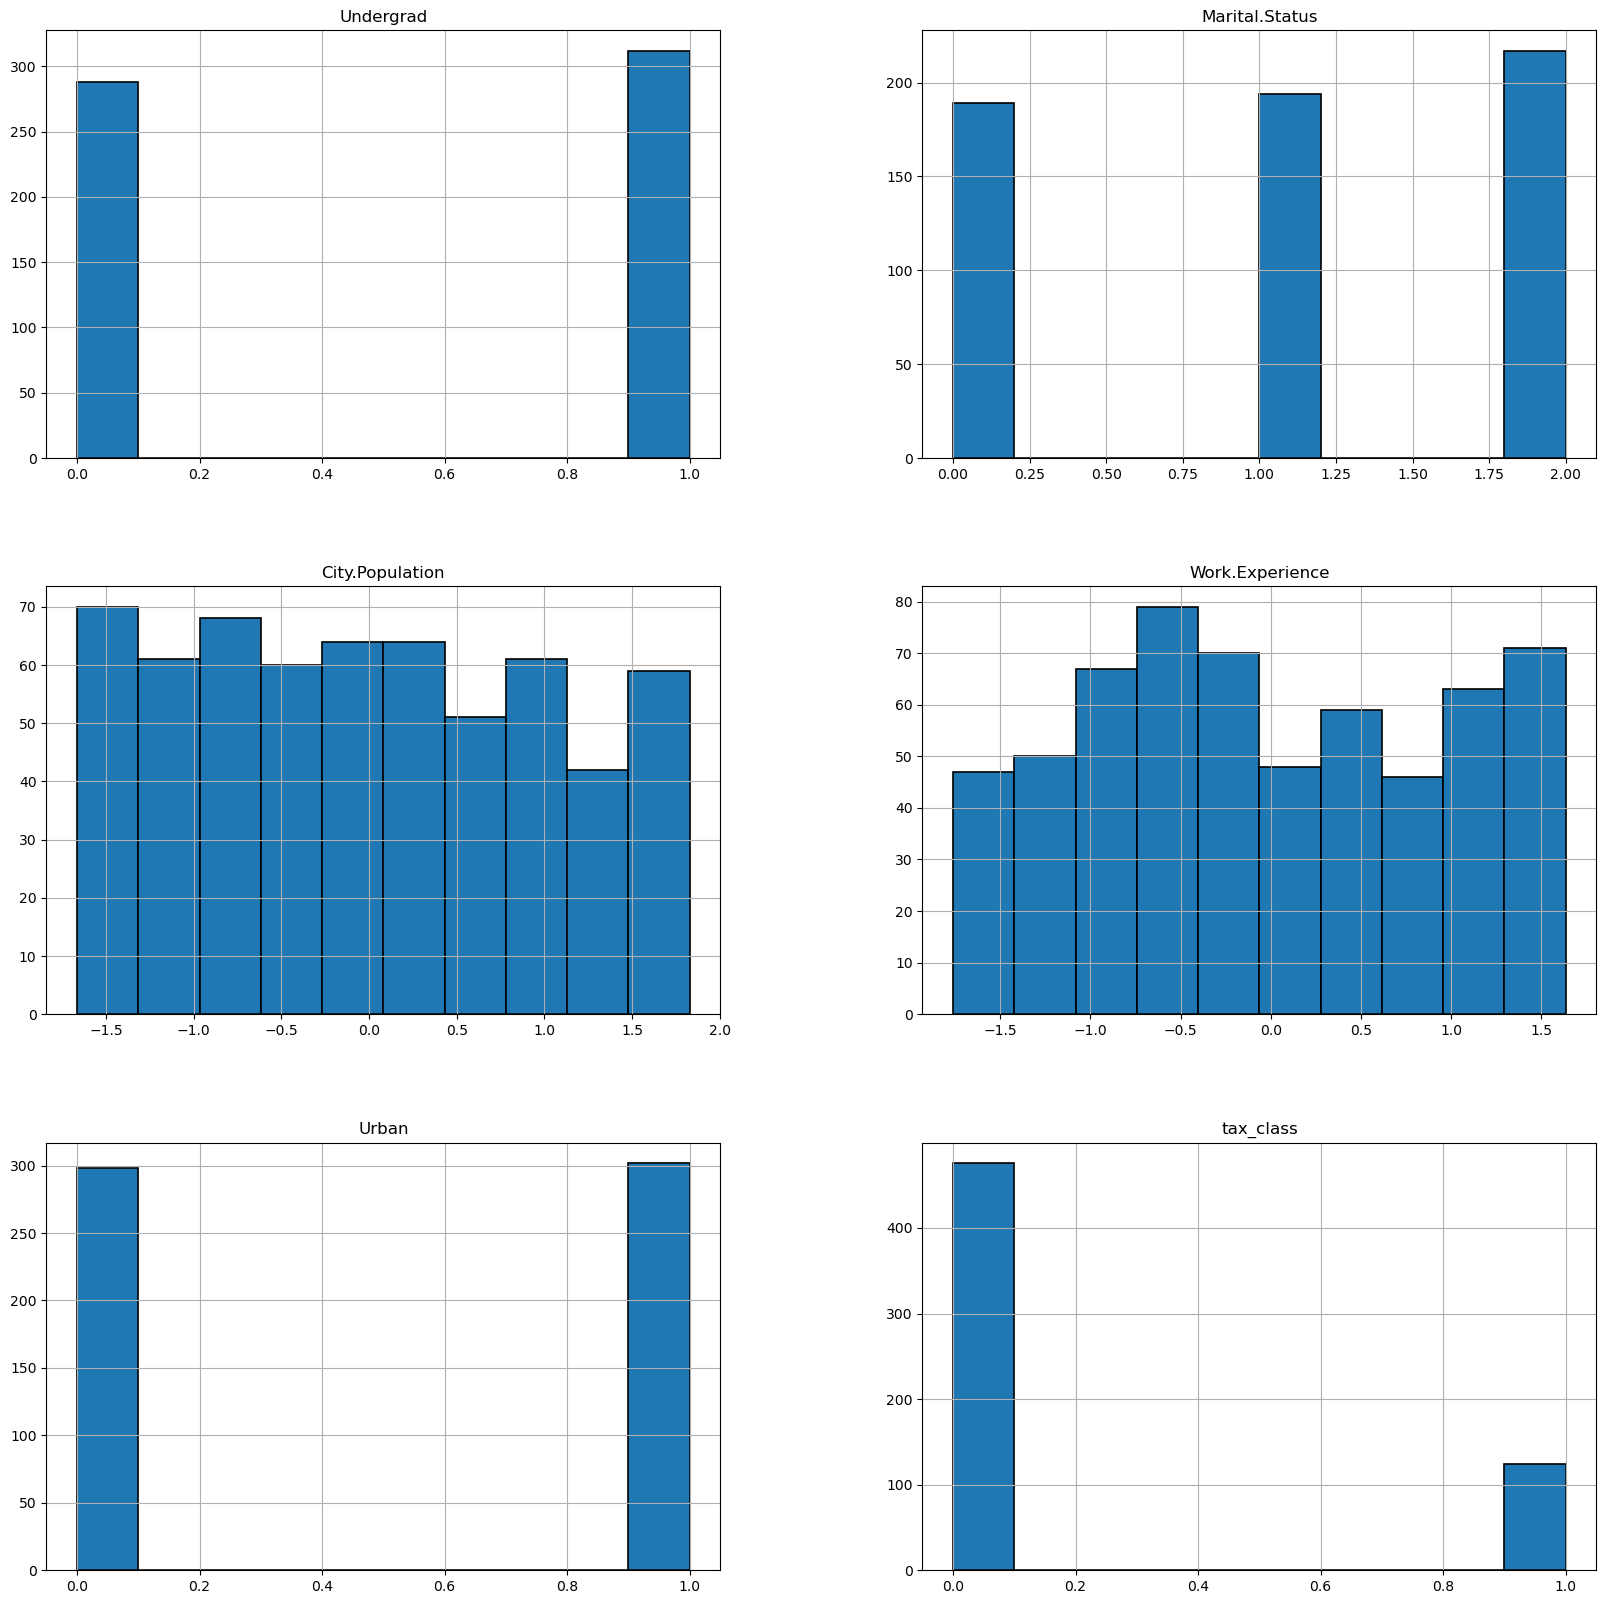

In [49]:
# Visulazing the distibution of the data for every feature
df.hist(edgecolor='black', linewidth=1.2, figsize=(20, 20))

In [50]:
df.to_csv('auto.csv')

<Axes: >

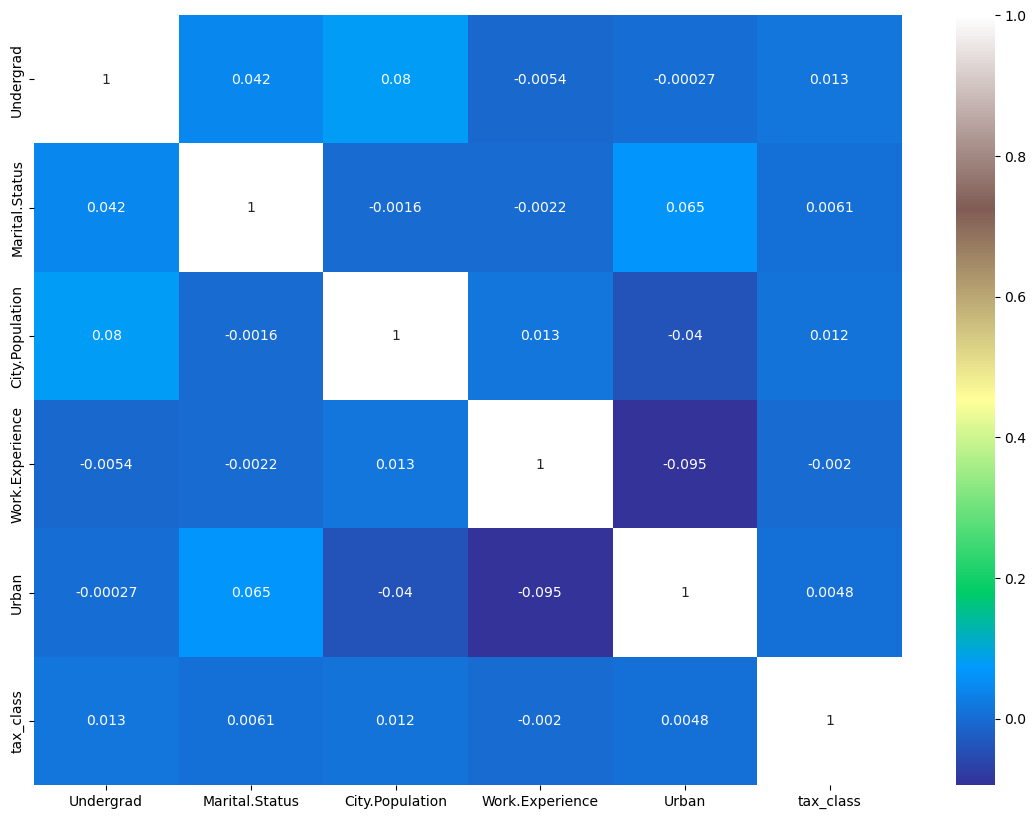

In [51]:
plt.figure(figsize=(14,10))
import seaborn as sns
sns.heatmap(df.corr(),annot=True,cmap='terrain')

In [52]:
pdata=df.copy()
pdata.head(2)

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,tax_class
0,0,2,-1.178521,-0.629143,1,0
1,1,0,0.508500,0.276370,1,0


In [53]:
x=pdata.iloc[:,0:-1]
y=pdata['tax_class']
y.value_counts()

0    476
1    124
Name: tax_class, dtype: int64

# Model building using Random forest

In [54]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=42)
from sklearn.ensemble import RandomForestClassifier 

In [55]:
modelb=RandomForestClassifier()
modelb.fit(x_train,y_train)
pred=modelb.predict(x_test)
print(np.mean(y_test==pred))

0.75


# Using grid search optimisation

In [56]:
modelb=RandomForestClassifier(criterion='gini',max_depth= 19,max_leaf_nodes=19,n_estimators=1000)
modelb.fit(x,y)
pred=modelb.predict(x)
print(np.mean(y==pred))

0.7966666666666666


In [57]:
modelb=RandomForestClassifier(criterion='gini',max_depth= 19,max_leaf_nodes=19,n_estimators=1000)
modelb.fit(x_train,y_train)
pred=modelb.predict(x_train)
print(np.mean(y_train==pred))

0.7979166666666667


# Applying K-Fold cross Validation

In [58]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold=KFold(n_splits=10)
results=cross_val_score(modelb,x,y,cv=kfold)
print(results.mean())

0.7933333333333332


# Bagging

In [59]:
modelb1=RandomForestClassifier(n_estimators=500,criterion='entropy',max_leaf_nodes=19,max_depth=19)
from sklearn.ensemble import BaggingClassifier
model=BaggingClassifier(estimator=modelb1)
results=cross_val_score(model,x,y,cv=kfold)
print(results.mean())

0.7933333333333332


# Boosting

In [60]:
from sklearn.ensemble import AdaBoostClassifier
model=AdaBoostClassifier(estimator=modelb)
results=cross_val_score(model,x,y,cv=kfold)
print(results.mean())

C:\Users\keert\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\keert\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\keert\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\keert\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use t

0.7550000000000001


# Voting classifier

In [61]:
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
estimators=[]
model1=LogisticRegression(max_iter=500,solver='liblinear')
estimators.append(('logistic',model1))
model2=DecisionTreeClassifier()
estimators.append(('cart',model2))
model3=SVC()
estimators.append(('svm',model3))
model4=AdaBoostClassifier(estimator=modelb1)
estimators.append(('adaboost',model4))
model5=BaggingClassifier(estimator=modelb1)
estimators.append(('bagging',model5))
model6=RandomForestClassifier(n_estimators=500,criterion='entropy',max_leaf_nodes=19,max_depth=19)
estimators.append(('RandomForest',model6))

ensemble=VotingClassifier(estimators)
results=cross_val_score(ensemble,x,y,cv=kfold)
print(results)

C:\Users\keert\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\keert\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\keert\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\keert\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use t

[0.78333333 0.76666667 0.71666667 0.75       0.81666667 0.71666667
 0.9        0.75       0.85       0.88333333]


In [62]:
print(results.mean())

0.7933333333333332


# XGBM

In [63]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable


In [64]:
from tqdm.notebook import tqdm, trange
import time
# First XGBoost model for dataset
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [65]:
xgmodel = XGBClassifier()
xgmodel.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [66]:
# make predictions for test data
y_pred = xgmodel.predict(x_test)
predictions = [round(value) for value in y_pred]

In [67]:
y_pred1 = xgmodel.predict(x_train)
predictions1 = [round(value) for value in y_pred1]

In [68]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 70.83%


In [69]:
# evaluate predictions
accuracy = accuracy_score(y_train, predictions1)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 99.17%


# LGBM

In [70]:
!pip install lightgbm

Defaulting to user installation because normal site-packages is not writeable


In [71]:
import lightgbm as lgb

In [72]:
d_train = lgb.Dataset(x_train, label=y_train)

In [73]:
params = {}
params['learning_rate'] = 0.003
params['boosting_type'] = 'gbdt'
params['objective'] = 'binary'
params['metric'] = 'binary_logloss'
params['sub_feature'] = 0.5
params['num_leaves'] = 10
params['min_data'] = 50
params['max_depth'] = 19

In [74]:
clf = lgb.train(params, d_train, 100)

[LightGBM] [Info] Number of positive: 98, number of negative: 382
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006395 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 199
[LightGBM] [Info] Number of data points in the train set: 480, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.204167 -> initscore=-1.360453
[LightGBM] [Info] Start training from score -1.360453
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

In [75]:
#Prediction
y_pred=clf.predict(x_test)

In [76]:
predictions = [round(value) for value in y_pred]

In [77]:
accuracy = accuracy_score(y_test, predictions)
accuracy

0.7833333333333333